In [ ]:
!pip install rasterio
!pip install earthpy
!pip install rioxarray

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [3]:
%ls

'Colab Notebooks'/   data/   Dataset/  'Getting started.pdf'   LST.h5


In [12]:
import rioxarray
surface_HARV = rioxarray.open_rasterio("/content/drive/My Drive/data/GIOVANNI-g4.timeAvgMap.GPM_3IMERGM_06_precipitation.20181101-20181130.125W_34N_117W_41N.tif")
surface_HARV

<xarray.DataArray 'GPM_3IMERGM_06_precipitation' (band: 1, y: 70, x: 79)>
array([[[0.101967, 0.09959 , ..., 0.027294, 0.030498],
        [0.099955, 0.101956, ..., 0.029344, 0.029712],
        ...,
        [0.012572, 0.011159, ..., 0.037821, 0.036171],
        [0.012667, 0.011353, ..., 0.042197, 0.038186]]], dtype=float32)
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 40.95 40.85 40.75 40.65 ... 34.35 34.25 34.15 34.05
  * x            (x) float64 -125.2 -125.1 -125.0 ... -117.5 -117.4 -117.3
    spatial_ref  int64 0
Attributes:
    cell_methods:          time: mean
    CodeMissingValue:      -9999.9
    coordinates:           lat lon
    DimensionNames:        time,lon,lat
    fullnamepath:          /Grid/precipitation
    latitude_resolution:   0.099998
    longitude_resolution:  0.099991
    long_name:             Merged satellite-gauge precipitation estimate - Fi...
    origname:              precipitation
    product_short_name:    GPM_3IMERGM
    product_version:       6
    quantity_type:         Precipitation
    standard_name:         precipitation
    units:                 mm/hr
    _FillValue:            -9999.900390625
    scale_factor:          1.0
    add_offset:            0.0
    grid_mapping:          spatial_ref

In [13]:
print(surface_HARV.rio.crs)
print(surface_HARV.rio.nodata)
print(surface_HARV.rio.bounds())
print(surface_HARV.rio.width)
print(surface_HARV.rio.height)

EPSG:4326
-9999.9
(-125.20000154544145, 33.99999855895759, -117.29999904561177, 41.00000077399655)
79
70


In [14]:
surface_HARV.values

array([[[0.10196687, 0.09959045, 0.11058   , ..., 0.02888031,
         0.02729432, 0.03049761],
        [0.09995499, 0.10195572, 0.11715171, ..., 0.03183936,
         0.02934435, 0.0297116 ],
        [0.10270716, 0.10258073, 0.11755753, ..., 0.02561544,
         0.0268796 , 0.02656784],
        ...,
        [0.01295627, 0.0113133 , 0.01132412, ..., 0.03844724,
         0.03628217, 0.03499246],
        [0.01257189, 0.01115913, 0.0115369 , ..., 0.04190978,
         0.0378206 , 0.03617107],
        [0.01266651, 0.01135311, 0.0110585 , ..., 0.04428561,
         0.04219713, 0.03818556]]], dtype=float32)

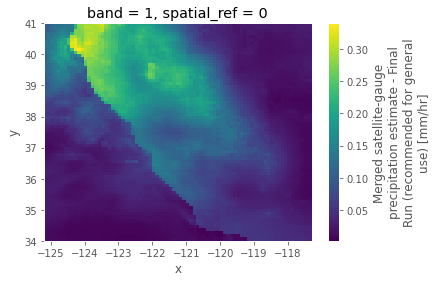

In [15]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
surface_HARV.plot()

In [ ]:
#import earthpy
#print(earthpy.epsg[surface_HARV.rio.crs])


In [16]:
print(surface_HARV.min())
print(surface_HARV.max())

<xarray.DataArray 'GPM_3IMERGM_06_precipitation' ()>
array(0.00250873)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray 'GPM_3IMERGM_06_precipitation' ()>
array(0.33921763)
Coordinates:
    spatial_ref  int64 0


In [17]:
import numpy
print(numpy.percentile(surface_HARV, 25))
print(numpy.percentile(surface_HARV, 75))


0.023627418093383312
0.12121684849262238


In [18]:
surface_terrain_HARV_UTM18 = rioxarray.open_rasterio("/content/drive/My Drive/data/MOD13A1.006__500m_16_days_NDVI_doy2018305_aid0001.tif")
surface_terrain_HARV_UTM18

<xarray.DataArray (band: 1, y: 1055, x: 1291)>
[1362005 values with dtype=int16]
Coordinates:
  * band         (band) int64 1
  * y            (y) float64 41.29 41.28 41.28 41.27 ... 36.91 36.9 36.9 36.89
  * x            (x) float64 -124.1 -124.1 -124.1 ... -118.7 -118.7 -118.7
    spatial_ref  int64 0
Attributes:
    _FillValue:    -3000.0
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

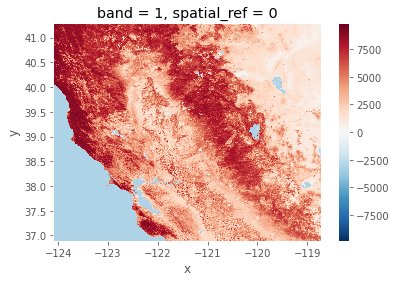

In [19]:
plt.style.use("ggplot")
surface_terrain_HARV_UTM18.plot()

In [20]:
terrain_HARV_matched = surface_terrain_HARV_UTM18.rio.reproject_match(surface_HARV)

In [21]:
canopy_HARV = surface_HARV + terrain_HARV_matched
canopy_HARV.compute()

<xarray.DataArray (band: 1, y: 46, x: 76)>
array([[[-2999.898 , -2999.9004, -2999.8894, ..., -2999.9702,
         -2999.9727, -2999.9695],
        [-2999.9001, -2999.898 , -2999.8828, ..., -2999.9697,
         -2999.9707, -2999.9702],
        [-2999.8972, -2999.8975, -2999.8823, ..., -2999.9744,
         -2999.9731, -2999.9734],
        ...,
        [-2999.9832, -2999.9841, -2999.9858, ..., -2999.9675,
         -2999.9702, -2999.971 ],
        [-2999.9875, -2999.988 , -2999.988 , ..., -2999.9624,
         -2999.9631, -2999.9636],
        [-2999.9873, -2999.9885, -2999.989 , ..., -2999.9553,
         -2999.9578, -2999.962 ]]], dtype=float32)
Coordinates:
  * y            (y) float64 40.95 40.85 40.75 40.65 ... 34.65 34.55 34.35 34.05
  * x            (x) float64 -125.2 -125.1 -125.0 ... -117.6 -117.4 -117.3
  * band         (band) int64 1
    spatial_ref  int64 0

In [22]:
print(canopy_HARV.min())
print(canopy_HARV.max())

<xarray.DataArray ()>
array(-2999.99633789)
Coordinates:
    spatial_ref  int64 0
<xarray.DataArray ()>
array(9340.30078125)
Coordinates:
    spatial_ref  int64 0


In [23]:
print(numpy.percentile(surface_HARV, 25))
print(numpy.percentile(surface_HARV, 75))

0.023627418093383312
0.12121684849262238


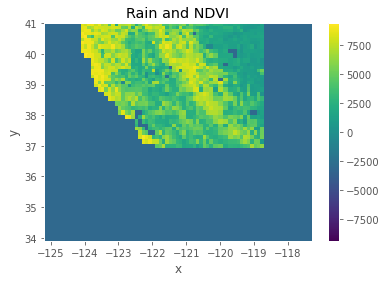

In [26]:
canopy_HARV.plot(cmap="viridis")
plt.style.use("ggplot")
plt.title("Rain and NDVI")
plt.ticklabel_format(style="plain") 

(array([2.018e+03, 1.000e+00, 2.100e+01, 2.290e+02, 2.780e+02, 2.160e+02,
        2.130e+02, 1.950e+02, 2.110e+02, 1.140e+02]),
 array([-2999.9963, -1765.9667,  -531.9369,   702.0928,  1936.1226,
         3170.1523,  4404.182 ,  5638.2114,  6872.241 ,  8106.271 ,
         9340.301 ], dtype=float32),
 <a list of 10 Patch objects>)

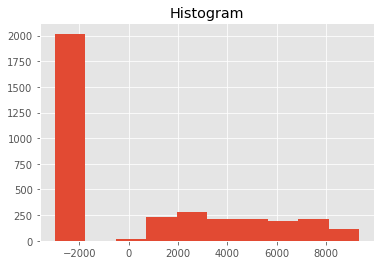

In [27]:
plt.figure()
plt.style.use('ggplot')
canopy_HARV.plot.hist()

(array([2.017e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 4.000e+00, 1.300e+01, 3.500e+01, 4.700e+01, 4.500e+01,
        4.200e+01, 6.000e+01, 4.900e+01, 6.800e+01, 7.300e+01, 5.600e+01,
        3.200e+01, 4.900e+01, 3.800e+01, 3.700e+01, 5.300e+01, 3.900e+01,
        5.200e+01, 4.200e+01, 5.000e+01, 3.700e+01, 3.200e+01, 3.400e+01,
        3.900e+01, 4.800e+01, 3.500e+01, 3.900e+01, 4.300e+01, 3.700e+01,
        4.100e+01, 4.000e+01, 5.000e+01, 3.900e+01, 2.300e+01, 2.800e+01,
        2.000e+01, 4.000e+00]),
 array([-2999.9963  , -2753.1904  , -2506.3845  , -2259.5786  ,
        -2012.7726  , -1765.9667  , -1519.1606  , -1272.3547  ,
        -1025.5488  ,  -778.74286 ,  -531.9369  ,  -285.13098 ,
          -38.325027,   208.48091 ,   455.28687 ,   702.0928  ,
          948.89874 ,  1195.7047  ,  1442.5106  ,  1689.3165  ,
         1936.1226  ,  2182.9285  ,  2429.7344  ,  2676.

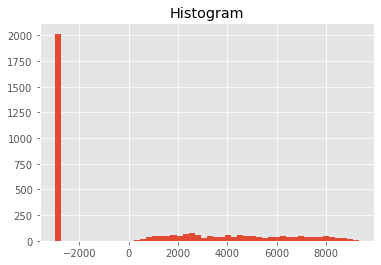

In [28]:
canopy_HARV.plot.hist(bins=50)